### Edgar Moises Hernandez-Gonzalez
#### 27/11/19-28/11/19
#### Clasificacion de alfa de los canales C3 y C4 de MI-EEG con Conv-LSTM-2D
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 510)
(288, 510)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 5D
x_train = x_train.reshape((n_samples_train, 1, 1, 255, 2))
x_test = x_test.reshape((n_samples_test, 1, 1, 255, 2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 255, 2)
(288, 1, 1, 255, 2)


Iteration: 1
288/288 [==============================] - 0s 827us/sample - loss: 5.6122 - acc: 0.2812
kappa:  0.04166666666666663
confusion matrix:
 [[28 26  8 10]
 [38 18 10  6]
 [25  9 24 14]
 [26 12 23 11]]
(0.28844069209922873, 0.28125, 0.27603131197860226, None)


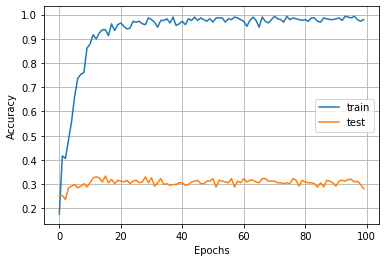

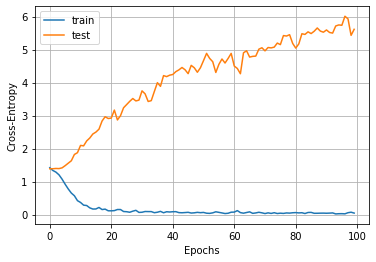

Iteration: 2
288/288 [==============================] - 0s 201us/sample - loss: 5.1932 - acc: 0.2917
kappa:  0.05555555555555558
confusion matrix:
 [[21 24 16 11]
 [24 19 13 16]
 [17 10 24 21]
 [15 13 24 20]]
(0.29160300483829893, 0.29166666666666663, 0.29127586254811233, None)


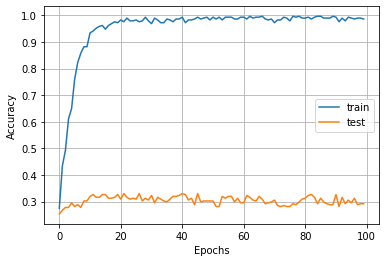

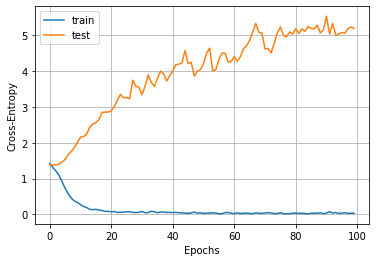

Iteration: 3
288/288 [==============================] - 0s 204us/sample - loss: 5.7599 - acc: 0.3056
kappa:  0.07407407407407407
confusion matrix:
 [[23 24 12 13]
 [25 26 10 11]
 [22  9 21 20]
 [15 18 21 18]]
(0.30667453840040415, 0.3055555555555556, 0.30486679124838195, None)


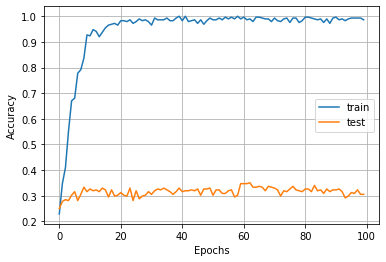

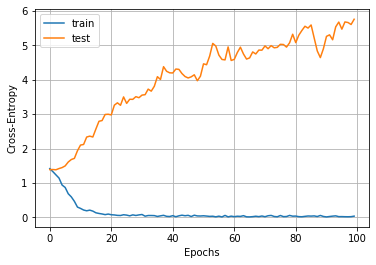

Iteration: 4
288/288 [==============================] - 0s 208us/sample - loss: 5.5611 - acc: 0.3056
kappa:  0.07407407407407407
confusion matrix:
 [[23 23 14 12]
 [26 25 13  8]
 [21 10 22 19]
 [19 16 19 18]]
(0.3088959223947223, 0.3055555555555556, 0.3053838802166295, None)


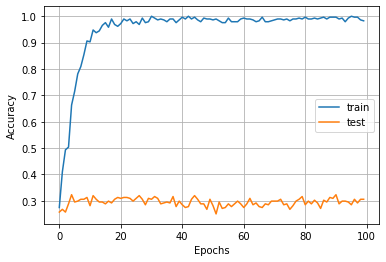

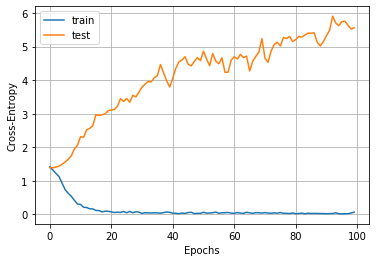

Iteration: 5
288/288 [==============================] - 0s 193us/sample - loss: 4.6641 - acc: 0.3056
kappa:  0.07407407407407407
confusion matrix:
 [[21 25 13 13]
 [26 23 12 11]
 [21 11 23 17]
 [15 12 24 21]]
(0.3087774580071003, 0.3055555555555556, 0.3063808359697864, None)


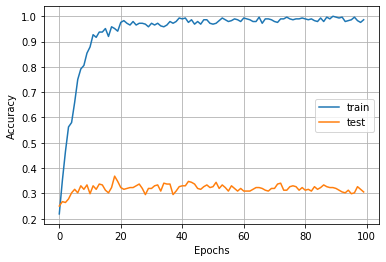

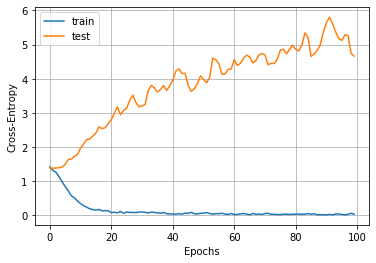

Iteration: 6
288/288 [==============================] - 0s 200us/sample - loss: 5.5121 - acc: 0.3090
kappa:  0.07870370370370372
confusion matrix:
 [[22 25  7 18]
 [28 21  8 15]
 [22  6 24 20]
 [16 11 23 22]]
(0.31594086021505374, 0.3090277777777778, 0.3109099485565371, None)


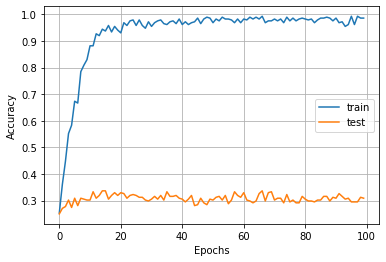

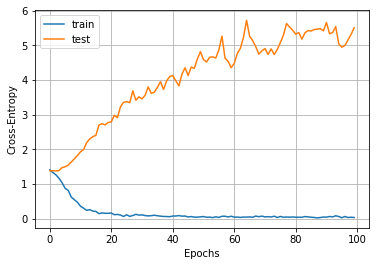

Iteration: 7
288/288 [==============================] - 0s 200us/sample - loss: 6.1747 - acc: 0.3125
kappa:  0.08333333333333337
confusion matrix:
 [[26 23 13 10]
 [27 23 12 10]
 [21  8 24 19]
 [23 15 17 17]]
(0.3171455906636319, 0.3125, 0.31184613235015063, None)


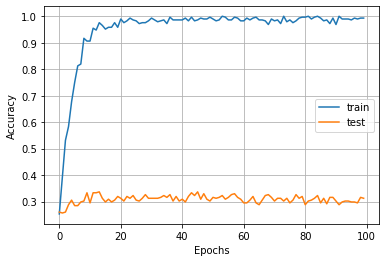

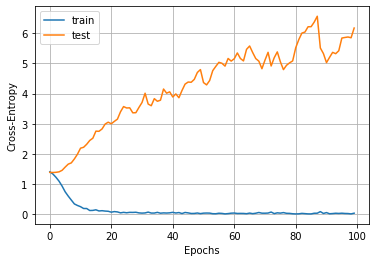

Iteration: 8
288/288 [==============================] - 0s 233us/sample - loss: 5.2048 - acc: 0.3194
kappa:  0.09259259259259256
confusion matrix:
 [[16 29 14 13]
 [19 30 12 11]
 [17 11 24 20]
 [15 15 20 22]]
(0.3169844057025795, 0.3194444444444444, 0.31731254528947506, None)


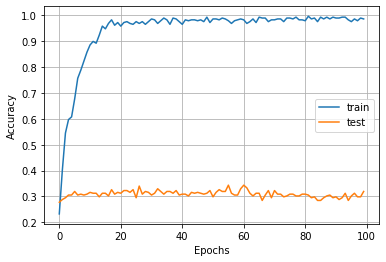

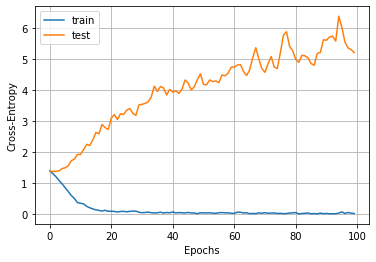

Iteration: 9
288/288 [==============================] - 0s 203us/sample - loss: 5.8387 - acc: 0.2778
kappa:  0.03703703703703709
confusion matrix:
 [[27 21 14 10]
 [30 21 15  6]
 [27 11 20 14]
 [24 15 21 12]]
(0.28256302521008403, 0.2777777777777778, 0.273054114158636, None)


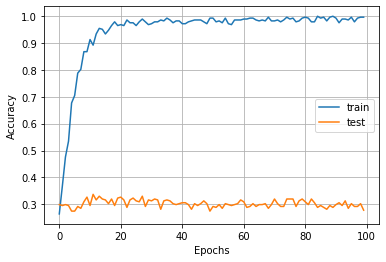

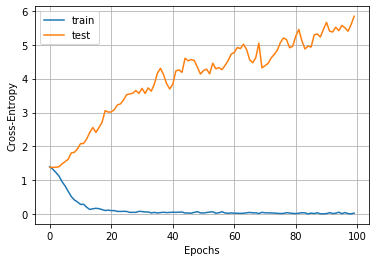

Iteration: 10
288/288 [==============================] - 0s 233us/sample - loss: 5.2735 - acc: 0.3229
kappa:  0.09722222222222221
confusion matrix:
 [[27 16 16 13]
 [30 20 11 11]
 [20  6 28 18]
 [21  9 24 18]]
(0.33052436164339155, 0.3229166666666667, 0.32160962768391005, None)


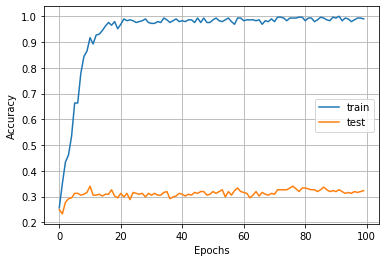

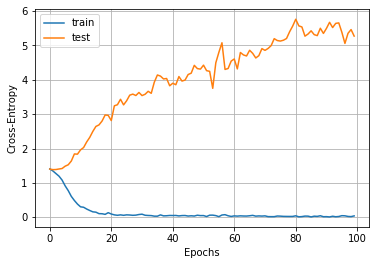


Resultados:
loss: [5.612204233805339, 5.193203952577379, 5.759887483384874, 5.56109094619751, 4.664132012261285, 5.512065304650201, 6.17469236585829, 5.204788631863064, 5.838680320315891, 5.27346854739719]
accuracy: [0.28125, 0.29166666, 0.30555555, 0.30555555, 0.30555555, 0.3090278, 0.3125, 0.31944445, 0.2777778, 0.32291666]
kappa: [0.04166666666666663, 0.05555555555555558, 0.07407407407407407, 0.07407407407407407, 0.07407407407407407, 0.07870370370370372, 0.08333333333333337, 0.09259259259259256, 0.03703703703703709, 0.09722222222222221]
precision: [0.28844069209922873, 0.29160300483829893, 0.30667453840040415, 0.3088959223947223, 0.3087774580071003, 0.31594086021505374, 0.3171455906636319, 0.3169844057025795, 0.28256302521008403, 0.33052436164339155]
recall: [0.28125, 0.29166666666666663, 0.3055555555555556, 0.3055555555555556, 0.3055555555555556, 0.3090277777777778, 0.3125, 0.3194444444444444, 0.2777777777777778, 0.3229166666666667]
f1: [0.27603131197860226, 0.29127586254811233, 0

In [14]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(ConvLSTM2D(64, (1,7), activation='relu', input_shape=(1,1,255,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [15]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_19 (ConvLSTM2D) (None, 1, 249, 64)        118528    
_________________________________________________________________
dropout_38 (Dropout)         (None, 1, 249, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 15936)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                1019968   
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 260       
Total params: 1,138,756
Trainable params: 1,138,756
Non-trainable params: 0
___________________________________________

In [17]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.3031
std: (+/- 0.0143)
kappa: 0.0708
precision: 0.3068
recall: 0.3031
f1: 0.3019
